## Implementation

**a. Diagrams**

High level architecture diagram

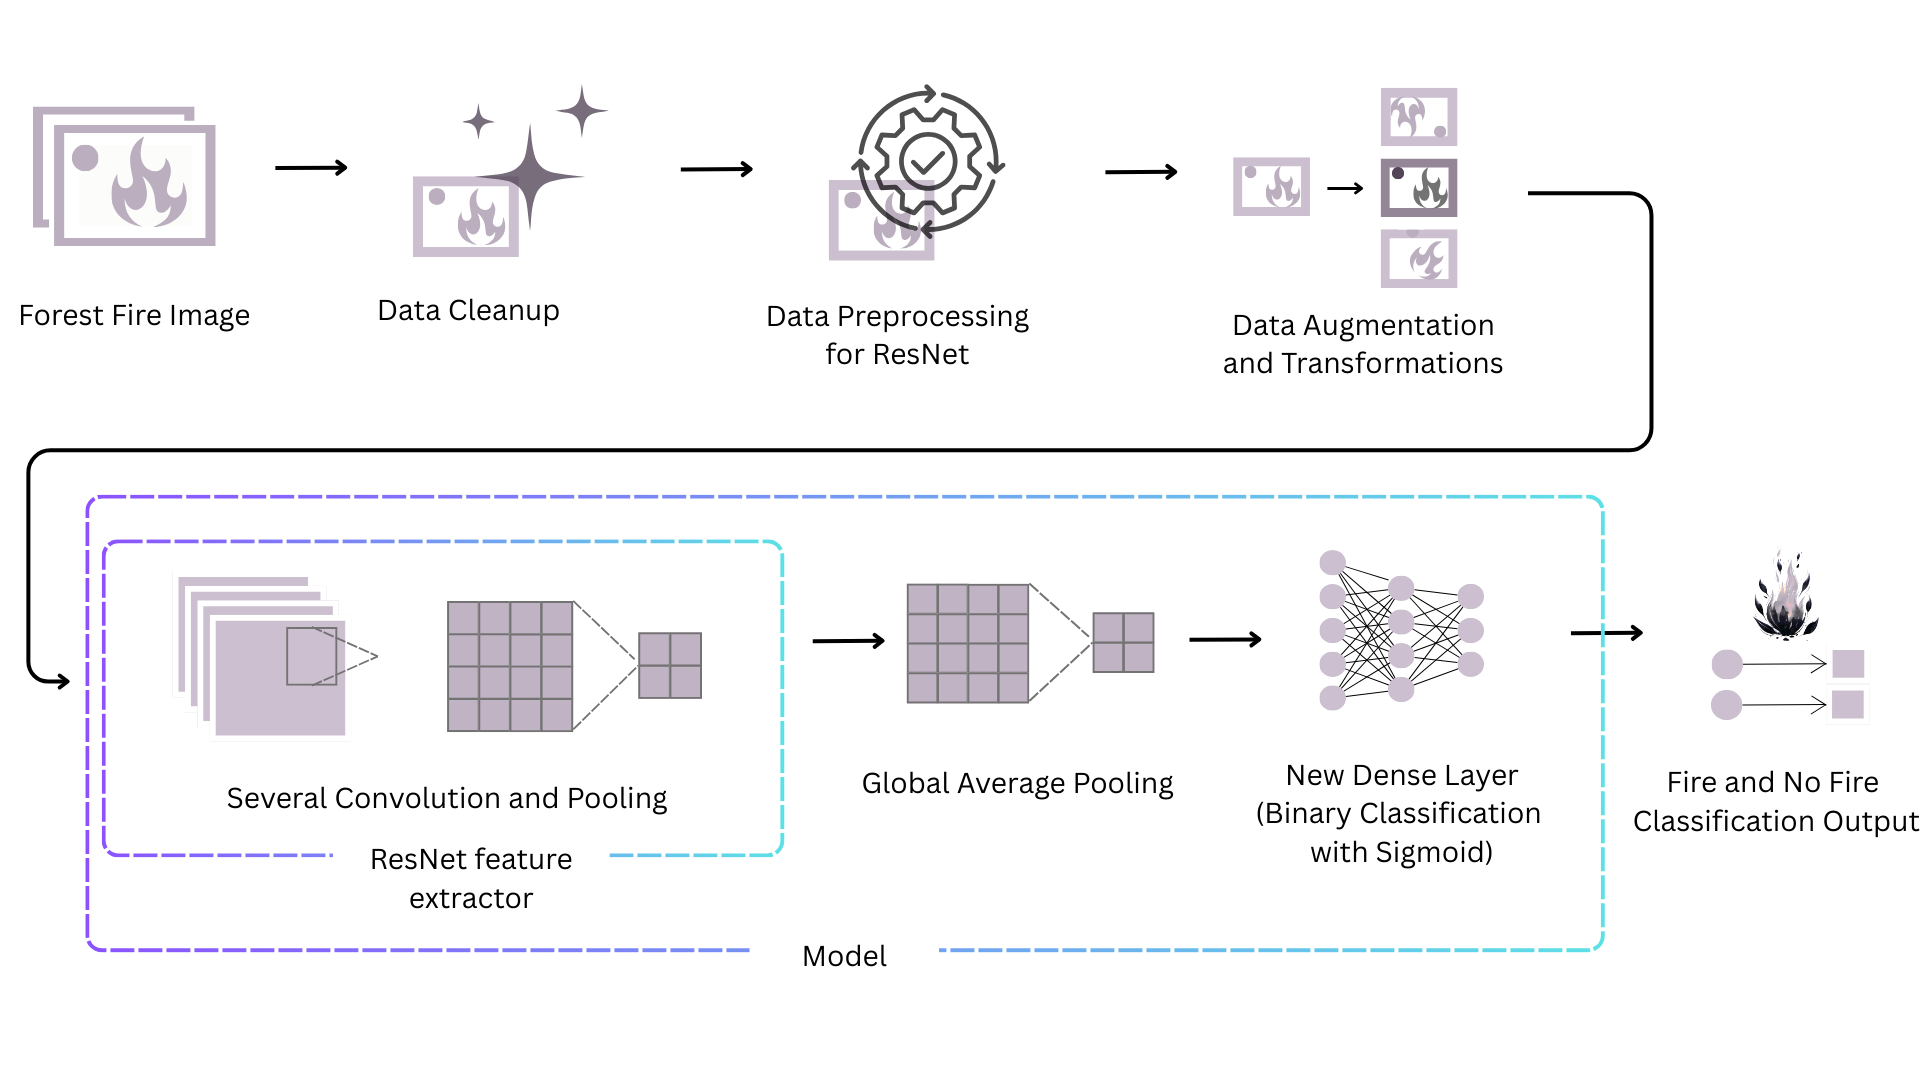

Diagram for transfer learning

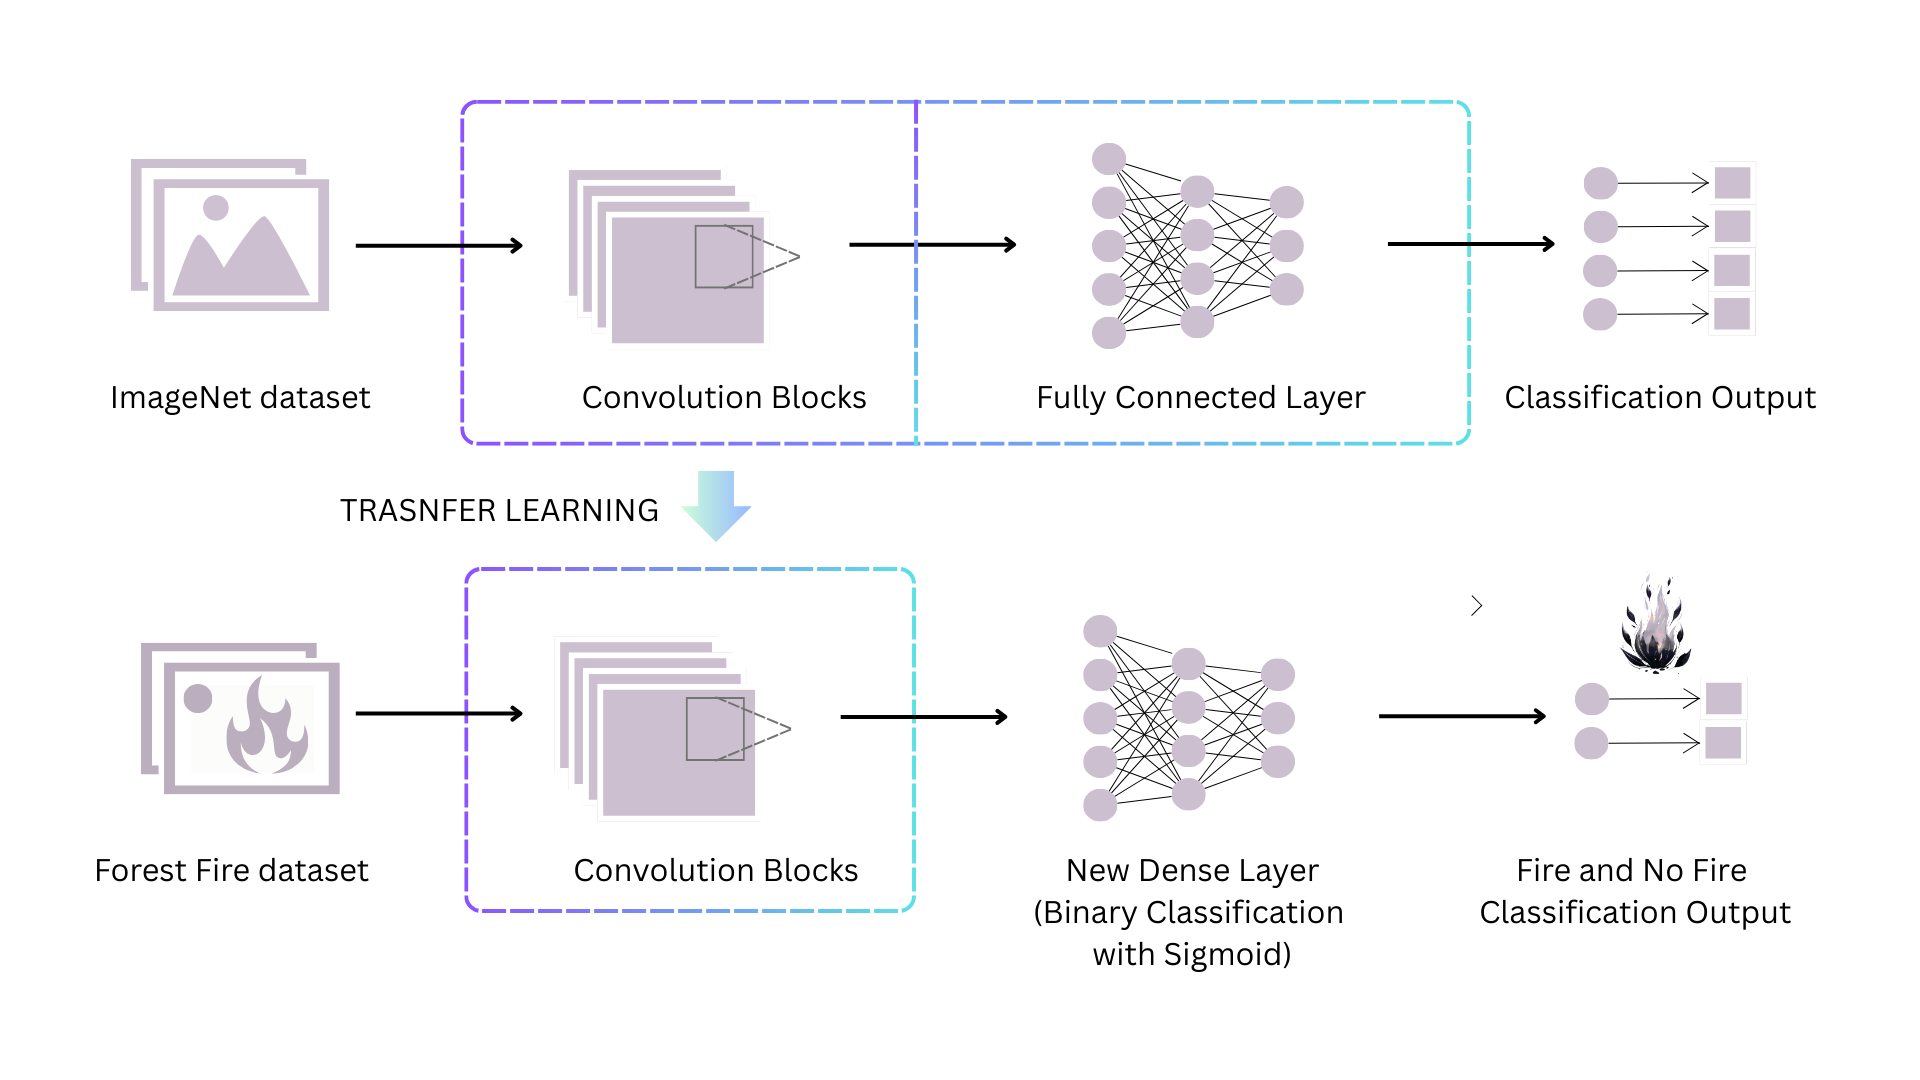

ResNet architecture diagram

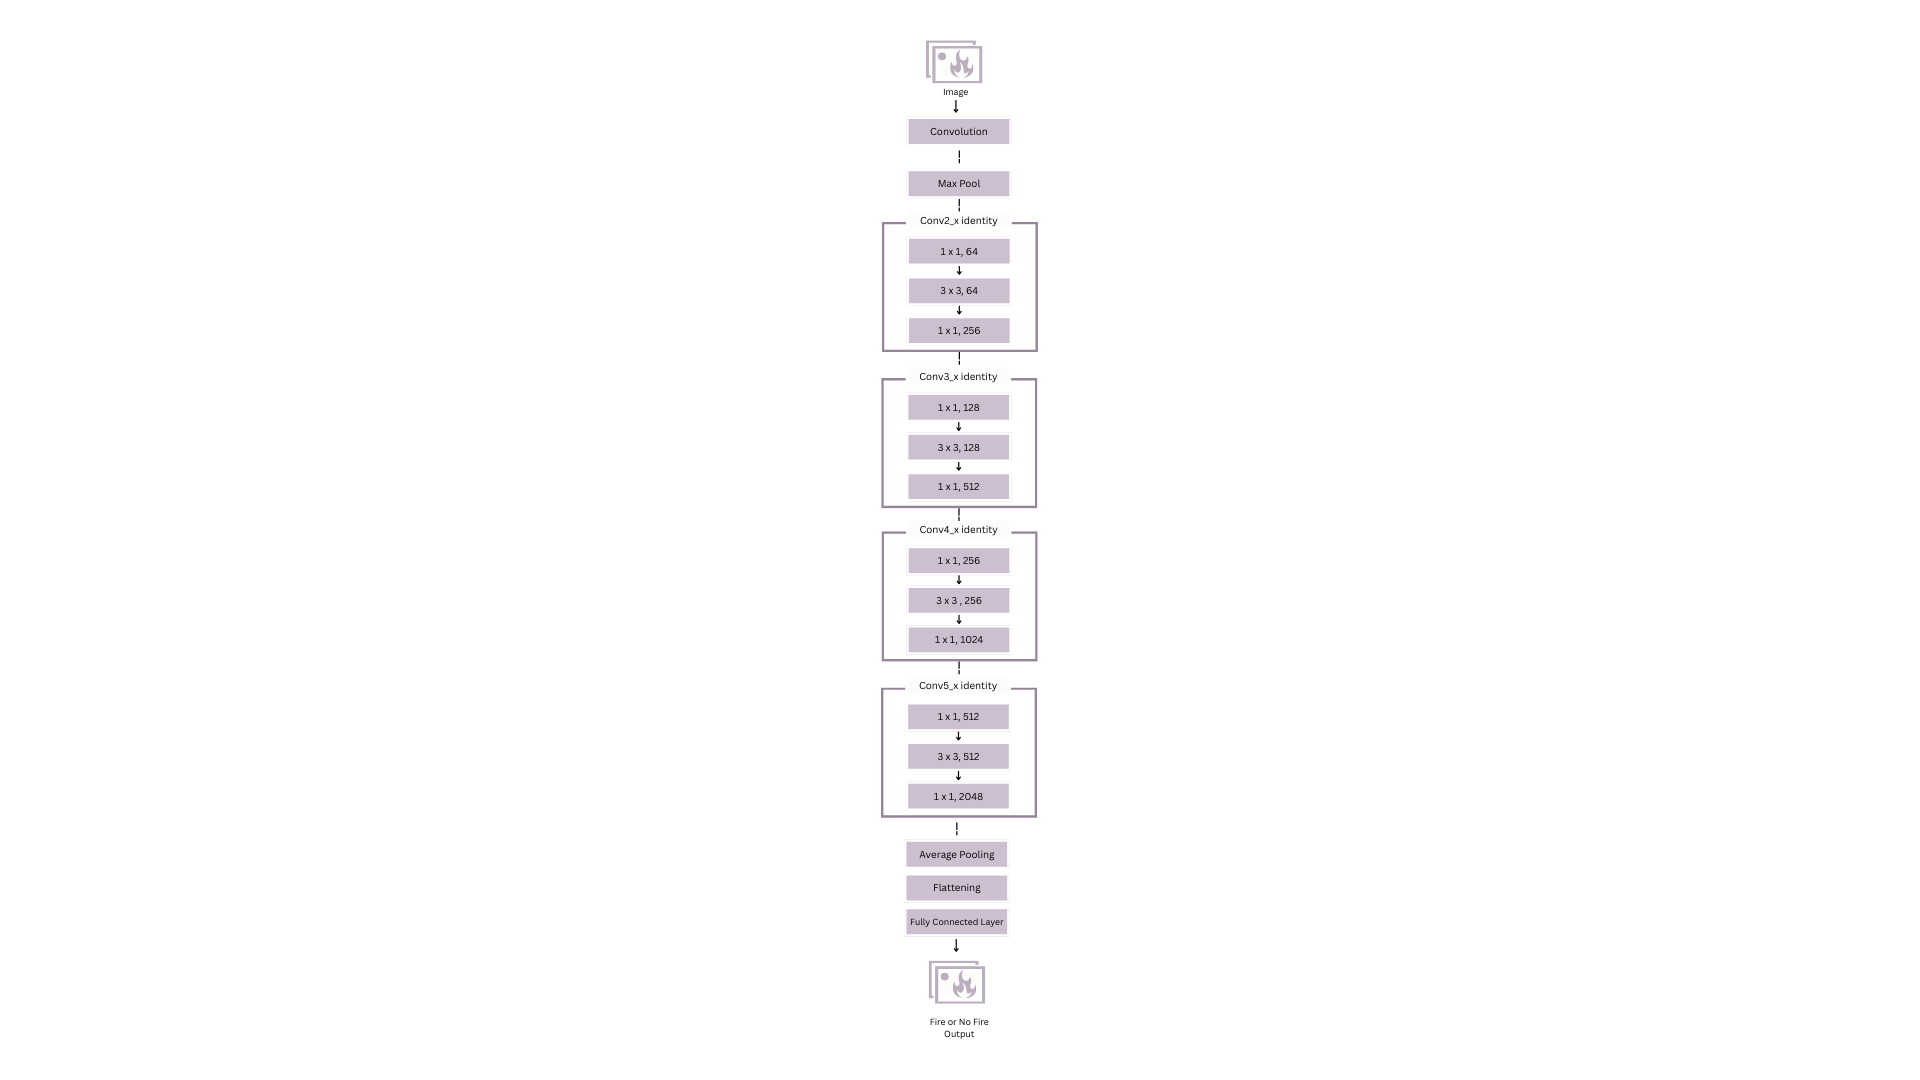

### **ResNet Implementation**

### Dataset Preprocessing

Import the datasets from kaggle


In [ ]:
import kagglehub

In [ ]:
mohnishsaiprasad_forest_fire_images_path = kagglehub.dataset_download('mohnishsaiprasad/forest-fire-images')
alik05_forest_fire_dataset_path = kagglehub.dataset_download('alik05/forest-fire-dataset')

print('Data sources import complete.')

Using Colab cache for faster access to the 'forest-fire-images' dataset.


100%|██████████| 142M/142M [00:01<00:00, 85.3MB/s]

Extracting files...


Data sources import complete.


Merge and Format the dataset

In [ ]:
import os
import shutil
from pathlib import Path

In [ ]:
# Define the paths

fire_sources = [
    Path(mohnishsaiprasad_forest_fire_images_path) / "Data/Train_Data/Fire",
    Path(mohnishsaiprasad_forest_fire_images_path) / "Data/Test_Data/Fire",
    Path(alik05_forest_fire_dataset_path) / "Forest Fire Dataset/Training/fire"
]

nofire_sources = [
    Path(mohnishsaiprasad_forest_fire_images_path) / "Data/Train_Data/Non_Fire",
    Path(mohnishsaiprasad_forest_fire_images_path) / "Data/Test_Data/Non_Fire",
    Path(alik05_forest_fire_dataset_path) / "Forest Fire Dataset/Training/nofire"
]

destination = "/content/ForestFireDataset"

paths = [
    Path("/content/ForestFireDataset/Fire"),
    Path("/content/ForestFireDataset/NoFire")
]


In [ ]:
# Iterate through the image files in sources and copy to destination
def copy_images(source_paths, destination):
    destination = Path(destination)
    destination.mkdir(parents=True, exist_ok=True)

    for source in source_paths:
        source = Path(source)
        if not source.exists():
            print(f"Source cannot be found {source}")
            continue
        for img in source.iterdir():
            if img.is_file():
                shutil.copy2(img, destination)
        print(f"Copied from {source} to {destination}")



In [ ]:
# copy_images(fire_sources, os.path.join(destination, "Fire"))
# copy_images(nofire_sources, os.path.join(destination, "NoFire"))
copy_images(fire_sources, paths[0])
copy_images(nofire_sources, paths[1])

print("Dataset merge completed")


Copied from /kaggle/input/forest-fire-images/Data/Train_Data/Fire to /content/ForestFireDataset/Fire
Copied from /kaggle/input/forest-fire-images/Data/Test_Data/Fire to /content/ForestFireDataset/Fire
Copied from /root/.cache/kagglehub/datasets/alik05/forest-fire-dataset/versions/1/Forest Fire Dataset/Training/fire to /content/ForestFireDataset/Fire
Copied from /kaggle/input/forest-fire-images/Data/Train_Data/Non_Fire to /content/ForestFireDataset/NoFire
Copied from /kaggle/input/forest-fire-images/Data/Test_Data/Non_Fire to /content/ForestFireDataset/NoFire
Copied from /root/.cache/kagglehub/datasets/alik05/forest-fire-dataset/versions/1/Forest Fire Dataset/Training/nofire to /content/ForestFireDataset/NoFire
Dataset merge completed


Check the data split for Fire/No Fire

In [ ]:
# Count the files inside the folder with jpg or png extensions
def count_images(folder):
    return len(list(folder.glob("*.[jp][pn]g")))


In [ ]:
print("Fire images:", count_images(paths[0]))
print("Non Fire images:", count_images(paths[0]))

Fire images: 3260
Non Fire images: 3260


Clean corrupted images from dataset

In [ ]:
from PIL import Image, UnidentifiedImageError

checked = 0
removed = 0
print("Starting dataset cleaning")

# Clean the corrupted images in the dataset if IOError, SyntaxError, UnidentifiedImageError occurs
for path in paths:
    if not path.exists():
        print(f"Path not found: {path}")
        continue

    for img in path.iterdir():
        if img.is_file() and img.suffix.lower() in [".jpg", ".jpeg", ".png"]:
            checked += 1
            try:
                with Image.open(img) as im:
                    im.verify()
            except (IOError, SyntaxError, UnidentifiedImageError):
                img.unlink()
                removed += 1
                print(f"Removed: {img}")

print(f"Cleaning done. Checked: {checked}, Removed: {removed}")


Starting dataset cleaning
Removed: /content/ForestFireDataset/Fire/F_925.jpg
Removed: /content/ForestFireDataset/Fire/F_73.jpg
Removed: /content/ForestFireDataset/Fire/F_848.jpg
Removed: /content/ForestFireDataset/Fire/F_765.jpg
Removed: /content/ForestFireDataset/Fire/F_935.jpg
Removed: /content/ForestFireDataset/Fire/F_632.jpg
Removed: /content/ForestFireDataset/Fire/F_649.jpg
Removed: /content/ForestFireDataset/Fire/F_855.jpg
Removed: /content/ForestFireDataset/Fire/F_610.jpg
Removed: /content/ForestFireDataset/Fire/F_774.jpg
Removed: /content/ForestFireDataset/Fire/F_636.jpg
Removed: /content/ForestFireDataset/Fire/F_72.jpg
Removed: /content/ForestFireDataset/Fire/F_689.jpg
Removed: /content/ForestFireDataset/Fire/F_845.jpg
Removed: /content/ForestFireDataset/Fire/F_714.jpg
Removed: /content/ForestFireDataset/Fire/F_940.jpg
Removed: /content/ForestFireDataset/Fire/F_60.jpg
Removed: /content/ForestFireDataset/Fire/F_856.jpg
Removed: /content/ForestFireDataset/Fire/F_863.jpg
Removed:

Check data split after cleanup

In [ ]:
print("Fire images:", count_images(paths[0]))
print("Non Fire images:", count_images(paths[0]))

Fire images: 2871
Non Fire images: 2871


Balance the dataset

In [ ]:
import random

def count_images(folder):
    return len(list(folder.glob("*.[jp][pn]g")))

def balance(paths):
    files_0 = list(paths[0].glob("*.[jp][pn]g"))
    files_1 = list(paths[1].glob("*.[jp][pn]g"))
    diff = abs(len(files_0) - len(files_1))

    if len(files_0) > len(files_1):
        to_remove = random.sample(files_0, diff)
    elif len(files_1) > len(files_0):
        to_remove = random.sample(files_1, diff)
    else:
        print("Datasets already balanced.")
        return

    for f in to_remove:
        f.unlink()
    print(f"Removed {diff} files to balance dataset.")
    print(f"Counts now: {count_images(paths[0])} (Fire), {count_images(paths[1])} (NoFire)")

balance(paths)


Removed 389 files to balance dataset.
Counts now: 2871 (Fire), 2871 (NoFire)


### Import the dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
# Seed for reproducibility
seed = 123
tf.random.set_seed(seed)
np.random.seed(seed)

Import the dataset as tf Dataset object

In [ ]:
# Dataset path
base_dir = '/content/ForestFireDataset'

# Parameters
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

# Load full dataset as a tf Dataset object
full_dataset = image_dataset_from_directory(
    base_dir,
    shuffle=True,
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=seed
)

Found 5742 files belonging to 2 classes.


In [ ]:
# Print the class names
class_names = full_dataset.class_names
print("Classes:", class_names)

Classes: ['Fire', 'NoFire']


### Data Split and Preprocessing

Data Split 80% train, 10% val, 10% test

In [ ]:
# Calculate split sizes (80% train, 10% val, 10% test)

dataset_size = full_dataset.cardinality().numpy()

train_size = int(0.8 * dataset_size)  #144
val_size = int(0.1 * dataset_size)    #18
test_size = dataset_size - train_size - val_size #18

# Split dataset
train_dataset = full_dataset.take(train_size)
val_test_dataset = full_dataset.skip(train_size)
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)

Transformations and Preprocessing

In [ ]:
# Data augmentations for training
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomBrightness(0.2),
    layers.RandomContrast(0.2),
])

In [ ]:
# ResNet50 preprocessing
preprocess_input = tf.keras.applications.resnet.preprocess_input

# Prepare datasets
def prepare(dataset, training=False):
    dataset = dataset.map(lambda x, y: (preprocess_input(x), y))
    if training:
        dataset = dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
    return dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


In [ ]:
train_dataset = prepare(train_dataset, training=True)
val_dataset = prepare(val_dataset)
test_dataset = prepare(test_dataset)

### Model Training

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

SHAPE = IMG_SIZE + (3,)

In [ ]:
# Import ResNet without the final classifier layer
base_model = tf.keras.applications.ResNet50(
    input_shape=SHAPE,
    include_top=False,
    weights='imagenet'
)

# base_model.summary()

#### Fine tuning - Training the new classfication head

In [ ]:
# Freeze base model
base_model.trainable = False

# Define input shape
inputs = tf.keras.Input(shape=SHAPE)

# Ensures layers remain frozen, preserving ImageNet learned features
x = base_model(inputs, training=False)

# 2048 feature maps of size 7 × 7 to into a single value per channel. (Output becomes a 2048-dimensional feature vector)
x = layers.GlobalAveragePooling2D()(x)

# Binary classifier
outputs = layers.Dense(1, activation='sigmoid')(x)

# Appending classifier head to ResNet architecture
model = models.Model(inputs, outputs)

# Compile model (initial training classifier)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train head only
epochs_head = 10

history_head = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs_head
)

Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 83s 507ms/step - accuracy: 0.6586 - loss: 0.6321 - val_accuracy: 0.7726 - val_loss: 0.5119
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 62s 429ms/step - accuracy: 0.8853 - loss: 0.3514 - val_accuracy: 0.8490 - val_loss: 0.3792
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 82s 430ms/step - accuracy: 0.9213 - loss: 0.2549 - val_accuracy: 0.8924 - val_loss: 0.2888
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 70s 482ms/step - accuracy: 0.9404 - loss: 0.2069 - val_accuracy: 0.9028 - val_loss: 0.2526
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 62s 429ms/step - accuracy: 0.9451 - loss: 0.1864 - val_accuracy: 0.9149 - val_loss: 0.2315
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 90s 480ms/step - accuracy: 0.9448 - loss: 0.1704 - val_accuracy: 0.9323 - val_loss: 0.1884
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 62s 427ms/step - accuracy: 0.9546 - loss: 0.1518 - val_accuracy: 0.9375 - val_loss: 0.1831
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 63s 435ms/step - accuracy: 0.9517 - loss: 0

18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 248ms/step - accuracy: 0.9496 - loss: 0.1390

Test accuracy: 0.9516


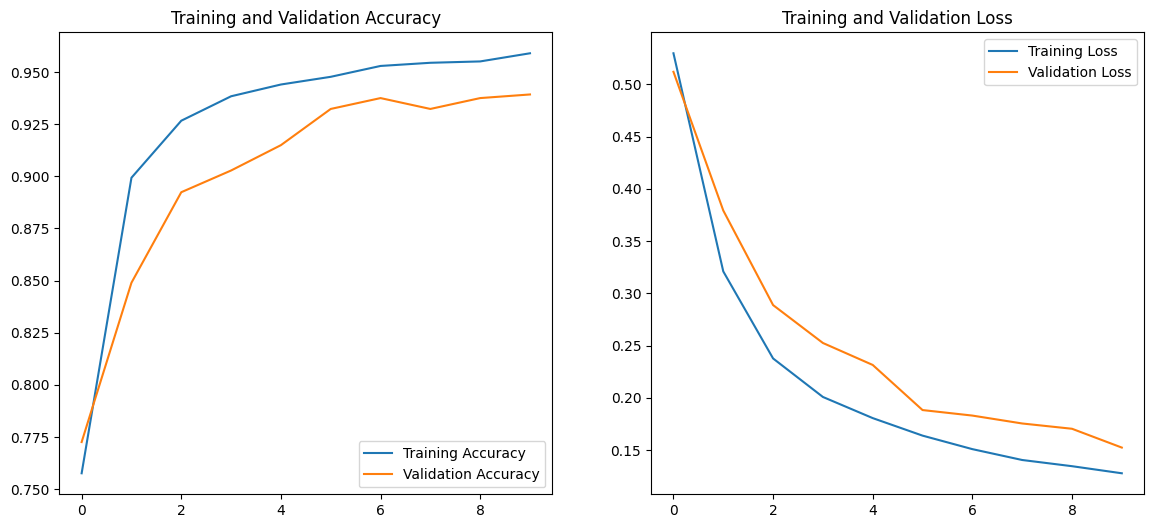

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy and loss for both phases combined
acc = history_head.history['accuracy']
val_acc = history_head.history['val_accuracy']
loss = history_head.history['loss']
val_loss = history_head.history['val_loss']
epochs_range = range(epochs_head)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
              precision    recall  f1-score   support

        Fire       0.95      0.94      0.95       272
      NoFire       0.95      0.95      0.95       286

    accuracy                           0.95       558
   macro avg       0.95      0.95      0.95       558
weighted avg       0.95      0.9

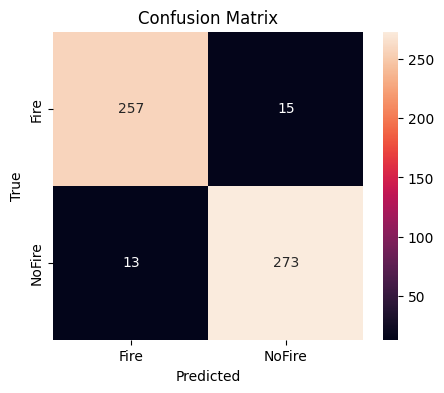

In [ ]:
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int).flatten()
    y_true.extend(labels.numpy())
    y_pred.extend(preds)


print(classification_report(
    y_true,
    y_pred,
    target_names=['Fire', 'NoFire'],
    zero_division=0
))
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Fire', 'NoFire'],
            yticklabels=['Fire', 'NoFire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### Fine tuning - Unfreeze final layers and train

In [ ]:
# Unfreeze the base model
base_model.trainable = True

# Freeze all layers except the last convolutional block
set_trainable = False
for layer in base_model.layers:
    if layer.name.startswith('conv5_'):
        set_trainable = True
    layer.trainable = set_trainable

In [ ]:
# Recompile model with a lower learning rate for fine-tuning
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-6),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 14,978,049 (57.14 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [ ]:
# Fine-tune the model (train head + last convolutional block)

epochs_fine = 15

history_fine = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs_fine
)

Epoch 1/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 86s 468ms/step - accuracy: 0.9162 - loss: 0.2238 - val_accuracy: 0.9323 - val_loss: 0.1680
Epoch 2/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 72s 498ms/step - accuracy: 0.9482 - loss: 0.1687 - val_accuracy: 0.9358 - val_loss: 0.1609
Epoch 3/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 72s 500ms/step - accuracy: 0.9620 - loss: 0.1406 - val_accuracy: 0.9427 - val_loss: 0.1511
Epoch 4/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 63s 438ms/step - accuracy: 0.9626 - loss: 0.1330 - val_accuracy: 0.9497 - val_loss: 0.1337
Epoch 5/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 71s 493ms/step - accuracy: 0.9583 - loss: 0.1233 - val_accuracy: 0.9479 - val_loss: 0.1347
Epoch 6/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 63s 437ms/step - accuracy: 0.9625 - loss: 0.1164 - val_accuracy: 0.9549 - val_loss: 0.1205
Epoch 7/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 64s 441ms/step - accuracy: 0.9635 - loss: 0.1175 - val_accuracy: 0.9635 - val_loss: 0.1096
Epoch 8/15
144/144 ━━━━━━━━━━━━━━━━━━━━ 65s 440ms/step - accuracy: 0.9644 - loss: 0

18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 116ms/step - accuracy: 0.9760 - loss: 0.0793

Test accuracy: 0.9749


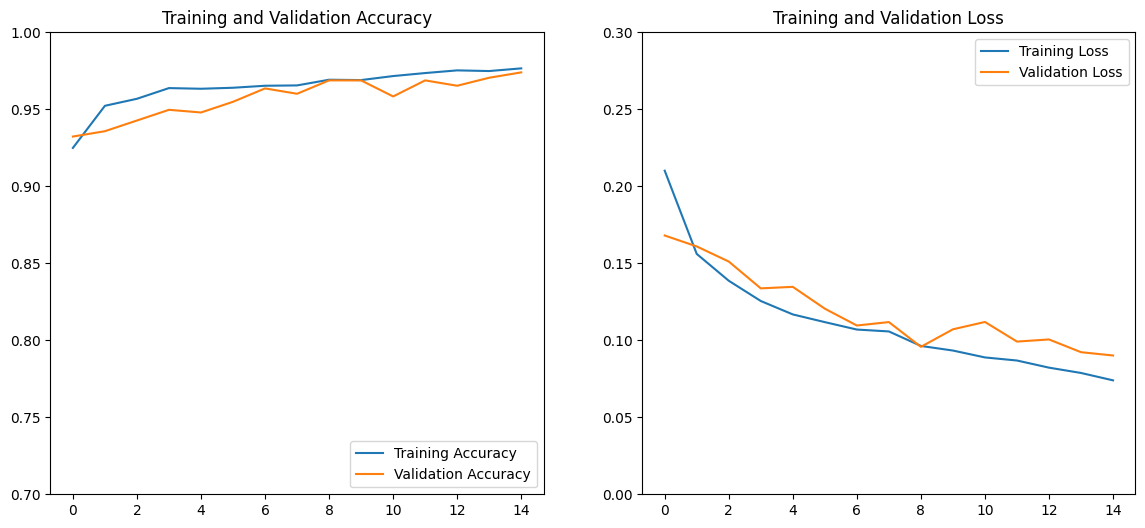

In [ ]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(test_dataset)
print(f'\nTest accuracy: {test_acc:.4f}')

# Plot training & validation accuracy and loss for phase 2
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']
epochs_range = range(epochs_fine)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.ylim(0.7, 1)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.ylim(0, 0.3)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
              precision    recall  f1-score   support

        Fire       0.98      0.97      0.98       272
      NoFire       0.98      0.98      0.98       286

    accuracy                           0.98       558
   macro avg       0.98      0.98      0.98       558
weighted avg       0.98      0.9

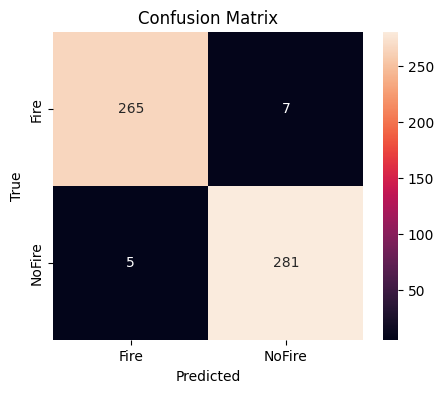

In [ ]:
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    preds = (preds > 0.5).astype(int).flatten()  # threshold sigmoid
    y_true.extend(labels.numpy())
    y_pred.extend(preds)


print(classification_report(
    y_true,
    y_pred,
    target_names=['Fire', 'NoFire'],
    zero_division=0
))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Fire', 'NoFire'],
            yticklabels=['Fire', 'NoFire'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Use of the implementation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


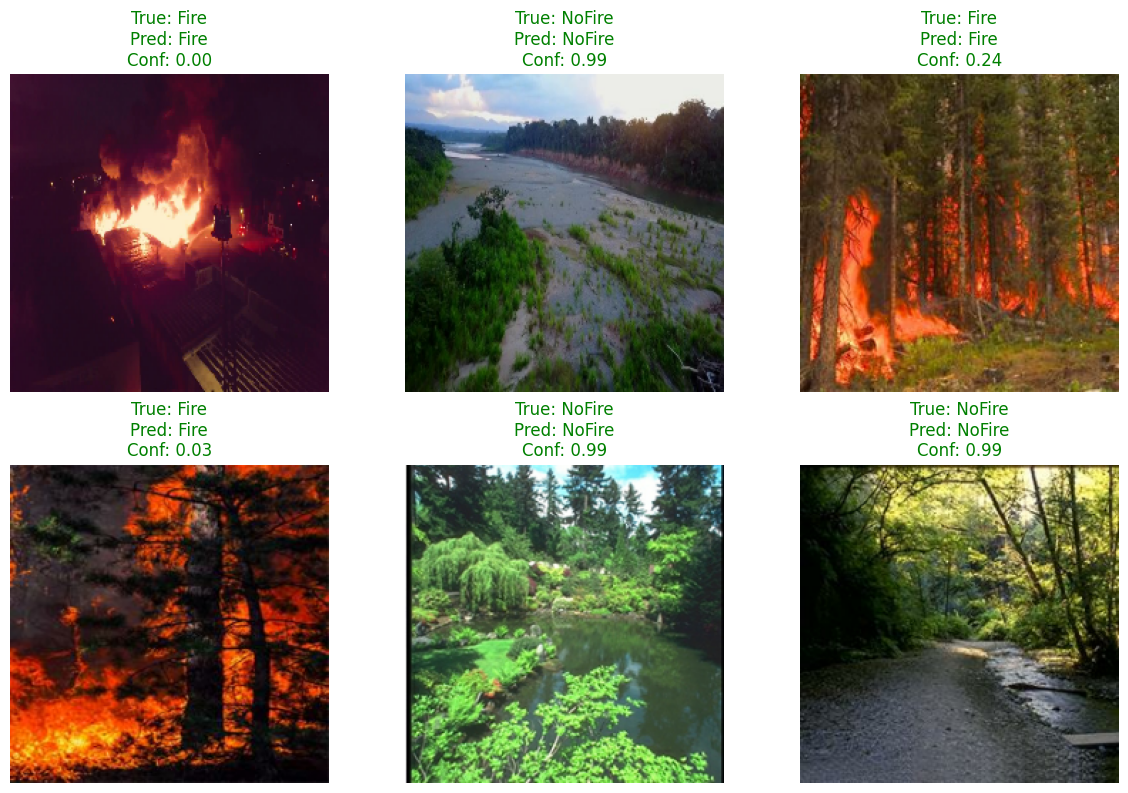

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch from test dataset
image_batch, label_batch = next(iter(test_dataset))

# Make predictions
pred_probs = model.predict(image_batch)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

def denormalize_resnet(img):
    img = img.copy()
    img[..., 0] += 103.939  # B
    img[..., 1] += 116.779  # G
    img[..., 2] += 123.68   # R
    img = img[..., ::-1]    # BGR → RGB
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img


class_names = ['Fire', 'NoFire']

plt.figure(figsize=(12, 8))

for i in range(6):
    ax = plt.subplot(2, 3, i + 1)

    img = denormalize_resnet(image_batch[i].numpy())
    plt.imshow(img)
    plt.axis("off")

    true_label = class_names[label_batch[i]]
    predicted_label = class_names[pred_labels[i]]
    confidence = pred_probs[i][0]

    title_color = "green" if true_label == predicted_label else "red"

    plt.title(
        f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.2f}",
        color=title_color
    )

plt.tight_layout()
plt.show()


### **CNN Implementation**

In [ ]:
cnn_train_dataset = full_dataset.take(train_size)
cnn_val_test_dataset = full_dataset.skip(train_size)

cnn_val_dataset = val_test_dataset.take(val_size)
cnn_test_dataset = val_test_dataset.skip(val_size)

AUTOTUNE = tf.data.AUTOTUNE

# Normalize images for CNN
def normalize_cnn(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    return x, y

data_augmentation_cnn = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


# Training dataset (with augmentation)
train_dataset_cnn = (
    cnn_train_dataset
    .map(normalize_cnn, num_parallel_calls=AUTOTUNE)
    .map(lambda x, y: (data_augmentation_cnn(x, training=True), y))
    .prefetch(AUTOTUNE)
)

# Validation dataset
val_dataset_cnn = (
    cnn_val_dataset
    .map(normalize_cnn, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

# Test dataset
test_dataset_cnn = (
    cnn_test_dataset
    .map(normalize_cnn, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

cnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=IMG_SIZE + (3,)),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),

    # -------- Classifier --------
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-6),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

history_cnn = cnn_model.fit(
    train_dataset_cnn,
    validation_data=val_dataset_cnn,
    epochs=10
)

test_loss, test_acc = cnn_model.evaluate(test_dataset_cnn)
print(f"CNN Test Accuracy: {test_acc:.4f}")




Epoch 1/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.5820 - loss: 0.6573 - val_accuracy: 0.7986 - val_loss: 0.5512
Epoch 2/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.8158 - loss: 0.5200 - val_accuracy: 0.8542 - val_loss: 0.4240
Epoch 3/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.8402 - loss: 0.4198 - val_accuracy: 0.8872 - val_loss: 0.3340
Epoch 4/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.8652 - loss: 0.3510 - val_accuracy: 0.8628 - val_loss: 0.3234
Epoch 5/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.8838 - loss: 0.3107 - val_accuracy: 0.9028 - val_loss: 0.2832
Epoch 6/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8876 - loss: 0.2863 - val_accuracy: 0.8819 - val_loss: 0.2688
Epoch 7/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 282s 2s/step - accuracy: 0.8915 - loss: 0.2668 - val_accuracy: 0.8993 - val_loss: 0.2542
Epoch 8/10
144/144 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.8998 - loss: 0.2564 - val_accu

## Testing and Evaluation


Accuracy : 0.9876

Loss : 0.0618

Precision : 0.97

Recall : 0.97

F1-Score : 0.97

According to the confusion matrix:
268 Fire images correctly classified as Fire

9 Fire images misclassified as NoFire

274 NoFire images correctly classified

7 NoFire images misclassified as Fire


**Strengths and Limitations of the Implementation**

The strengths of the model include the significantly high accuray and reduced false positive rate. The use of ImageNet weights has decreased the need for a very large labelled dataset.

The limitations of the model include the high computational power needed for the model and the dependence of the model accuracy on the quality of the domain specific training data. The black box nature of the model limits the transparency of the classifications.

### Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Classification Report:

              precision    recall  f1-score   support

        Fire       0.97      0.97      0.97       277
      NoFire       0.97      0.98      0.97       281

    accuracy                           0.97       558
   macro avg       0.97      0.97      0.97       558
weig

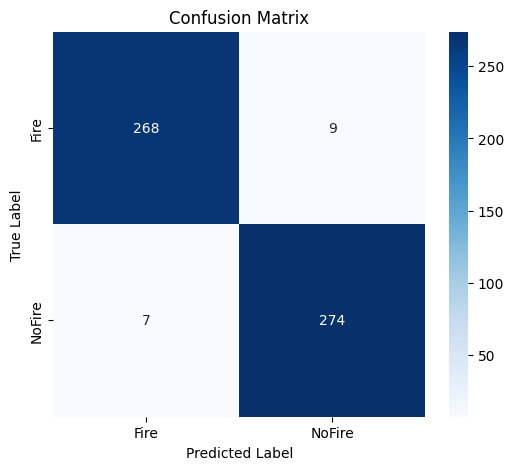

In [ ]:
y_true = []
y_pred = []

for images, labels in test_dataset:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 125ms/step - accuracy: 0.9898 - loss: 0.0468
Test Loss: 0.0618
Test Accuracy: 0.9785


In [ ]:
# Probabilities
probabilities = model.predict(test_dataset)
print('Probabilities shape:', probabilities.shape)  # (num_samples, 1)
print(probabilities[:10])  # Probability of the positive class (fire)


18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step
Probabilities shape: (558, 1)
[[5.9885031e-04]
 [9.9642700e-01]
 [6.3811280e-02]
 [4.9177385e-03]
 [1.4152572e-03]
 [1.9114111e-03]
 [6.1142715e-03]
 [9.7930682e-01]
 [8.4559666e-04]
 [9.9844116e-01]]


In [ ]:
predictions = (probabilities > 0.5).astype(int).flatten()
print('Size of variable predictions:', predictions.shape)
print('Predictions:', predictions[:10])
print('Labels:', class_names)


Size of variable predictions: (558,)
Predictions: [1 0 1 0 1 0 0 0 1 1]
Labels: ['Fire', 'NoFire']
